<a href="https://colab.research.google.com/github/RusAl84/IntroML/blob/master/2_11_%D0%A1%D0%BE%D1%81%D1%82%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B0%D1%82%D0%B0%D0%BA%D0%B8_%D0%BD%D0%B0_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Состязательные атаки на нейронные сети классификации изображений

## Введение

Нейронные сети прекрасны!

Решают множество задач лучше человека. Распознают и создают картинки, пишут музыку и стихи, даже играют в игры. Казалось бы все, создан полноценный искусственный интеллект, как в фильмах, который может полностью заменить человека.

Но нет. Нейронные сети "думают" не так, как человек. И в некоторых ситуациях, когда человек легко находит решение, нейронная сеть, какая бы сильная она ни была, ошибается.

Нейронную сеть очень просто обмануть!

Посмотрите на картинку. Левое изображение нейронная сеть распознает отлично, это панда. Но стоит добавить малюсенькое искажение (среднее изображение), которое вы даже не заметите (правое изображение), и нейронная сеть уверенно распознает на этом изображении гиббона. Чудеса.

![img](https://drive.google.com/uc?id=1kApf25Vn7UQDSyFhQsZl39acEBVzJt-u)



Но если вы сами возьмете картинку, добавите к ней маленький случайный шум, то нейронная сеть распознает ее без ошибок. Дело в том, что добавленный выше шум **не случайный**.

Как "думает" нейронная сеть? Возьму пиксели, умножу их на веса, сложу, пропущу через функцию активации, сделаю так много раз, сколько слоев в сети, получу выход. А что будет, если мы возьмем один пиксель и будем бесконечно увеличивать его значение (вес не нулевой)? Остальные пиксели потеряются на его фоне, от него будет получаться очень большое слагаемое, а другие пиксели дадут маленькие значения. И только этот пиксель будет определять выход сети.



В реальности мы не можем изменять пиксель бесконечно, так **давайте изменять все пиксели на небольшую величину, но так, чтобы суммарные изменения были большими!**

Для одного нейрона:

$x_i$ - входы

$\delta x_i$ - добавочки для входов, маленькие

$w_i$ - веса

Выход нормальный $y(x)= w_1 * x_1 + w_2 * x_2 + ... = ∑_i(w_i * x_i)$

Выход атакованный: $y_{attack}(x)= w_1 * (x_1 + \delta x_1) + w_2 *(x_2 + \delta x_2) + ... = ∑_i(w_i * (x_i+\delta x_i))$

$y_{attack}(x)=y(x) + ∑_i(w_i * \delta x_i)$

Если каждая добавочка входа $\delta x_i$ маленькая, то добавка выхода $ ∑_i(w_i * \delta x_i)$ не обязана быть маленькой.

Например, взяв $\delta x_i=\epsilon * w_i$, где $\epsilon$ маленькая, добавка выхода $ \epsilon* ∑_i(w_i * w_i)$ отнюдь не маленькая.





Для более сложных сетей, мы можем посчитать, насколько изменить пиксель, чтобы это изменение как можно больше искажало выход. Как посчитать? Да очень просто - найти градиент функции ошибки по этому пикселю. В обучении сети, когда изменяли веса, мы минимизировали функцию ошибки, а теперь будем максимизировать ее изменяя вход.

Такие действия, когда мы хотим обмануть нейронную сеть, назвали **состязательные атаки** (Adversarial attack). Возможность атаки на нейронную сеть это очень серьезно. Представьте, едет автомобиль, который распознает дорожные знаки, а террорист наклеил на знак маленькую наклейку, и нейронная сеть автомобиля ошибается при распознавании знака - авария.

Сегодня существует много типов атак на нейронные сети, любые сети страдают этим, какие-то больше, какие-то меньше. Например, атаки на системы распознавания изображений, когда мы изменяя немного вход, заставляем распознавать другой, фальшивый, класс.

Атаки могут быть *направленные*, когда мы хотим добиться какого-то конкретного класса при распознавании. Немножко поменяете изображение своего лица и нейронная сеть примет вас за владельца банка и разрешит снять миллионы долларов.

Атаки могут быть и *ненаправленные*, когда нам все равно, какой класс получится при распознавании, лишь бы не настоящий.

# НЕЛЬЗЯ ПОЛНОСТЬЮ ДОВЕРЯТЬ НЕЙРОННЫМ СЕТЯМ
и другим методам. Всегда надо проверять и перепроверять решения нейронной сети. За все должен отвечать человек.


# Метод быстрого знака градиента

Простой метод для реализации атаки на нейронную сеть - метод быстрого знака градиента (Fast Gradient Sign Method, FGSM). Он очень прост:

* имеем обученную нейронную сеть (например, распознает изображения)
* возьмем изображение, для которого хотим провести атаку
* посчитаем градиент функции ошибки по всем пикселям изображения. Нам нужен только знак градиента.
* изменим пиксели так, чтобы максимизировать функцию ошибки. В отличии от градиентного спуска, где мы минимизировали ошибку, теперь будем максимизировать ее. Чтобы изменения были маленькими (незаметными) умножим прибавляемый градиент на малое число эпсилон.
* если надо, повторим процедуру еще раз. Но надо не перестараться, чтобы общие изменения были маленькими. Это не всегда может получится.



Для классификации, когда имеем уровни уверенности в классах:

$ F_i $ - i-ый выход, который отвечает за уровень уверенности в классе i.

**Направленная атака**, есть целевой класс G --> **увеличиваем** уверенность для него. Автоматически сумма уверенностей для всех остальных классов будет снижаться.
$ x_i = x_i + \alpha * sign[\frac{\partial F_G}{\partial x_i}] $

**Ненаправленная атака**, есть настоящий класс R --> **уменьшаем** уверенность для него. Автоматически сумма уверенностей для всех остальных классов будет увеличиваться.
$ x_i = x_i - \alpha * sign[\frac{\partial F_R}{\partial x_i}] $



# Torch и CleverHans

Для примера давайте сделаем атаку на нейронную сеть, которая распознает изображения.
Для реализации нейронной сети воспользуемся библиотекой [torch](https://pytorch.org/), а реализацию метода FGSM возьмем из библиотеки [CleverHans](https://github.com/cleverhans-lab/cleverhans). Функции для работы с изображениями возьмем из библиотеки [torchvision](https://pytorch.org/docs/stable/torchvision/index.html). Если еще не установлены, надо поставить. При первой установке могут возникать некритичные предупреждения и для скачивания набора данных может потребоваться время, иногда бывает, что сервис скачивания временно недоступен, тогда подождите немного и повторите. В Colab уже установлены все эти библиотеки, кроме cleverhans.

Другую библиотеку для атак [advertorch](https://github.com/BorealisAI/advertorch) использовать сейчас не будем, но упомянем ее. Там реализованы другие типы атак.

In [ ]:
%%capture
# установим библиотеку, именно эту версию, чтобы избежать проблем совместимости
!pip install git+https://github.com/cleverhans-lab/cleverhans.git

In [ ]:
# Импортируем torch
import numpy as np #
import torch # сам torch
import torch.nn.functional as F # функции torch
from torch.autograd import Variable # для автоматического дифференцирования
from torchvision import transforms # наборы данных и методы для них

# Предобученная сеть VGG

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
# Названия классов
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-12-19 16:13:55--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-12-19 16:13:56 (91.5 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# прочитаем
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]


In [ ]:
# Скачиваем любое изображение
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# Предобработка изображения
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename) # открываем
# масштабируем и нормализуем
preprocess = transforms.Compose([
    transforms.Resize(256), # масштабируем
    transforms.CenterCrop(224), # обрезаем
    transforms.ToTensor(), # в тип Тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # нормализуем
])
# потом понадобится обратно денормализовать
postprocess = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])

input_tensor = preprocess(input_image) # изображение как тензор (3,224,224)
input_batch = input_tensor.unsqueeze(0) # изображение как тензор (1,3,224,224)


In [ ]:
# если есть GPU то на переводим модель на нее
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
# запускаем модель
with torch.no_grad():
    output = model(input_batch)
# возвращается вектор из 1000 элементов для классов Imagenet

# но они не нормализованы, нормализуем с помощью softmax
probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

In [ ]:
# выберем 5 самых уверенно распознанных класса
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.6673735976219177
Pomeranian 0.16195233166217804
Eskimo dog 0.017759378999471664
collie 0.017686229199171066
keeshond 0.01706553064286709


In [ ]:
# наша картинка
display(input_image)


Итак, сеть VGG верно распознала класс изображения, это и в правду самоед.

## Атака на нейронную сеть


Теперь сделаем атаку:
* укажем targeted направленная или не направленная атака. Для направленной нужно сделать цели goal - номер класса который мы хотели бы получать.
* зададим параметры метода, число шагов NUM_STEPS атаки и ее "силу" эпсилон EPSILON.



In [ ]:
# Импортируем cleverhans
# Метод FGSM
from cleverhans.torch.attacks.fast_gradient_method import fast_gradient_method

In [ ]:
NUM_STEPS=5 # число шагов атаки
EPSILON=0.1# "сила" атаки
targeted=True # направленная
#targeted=False # ненаправленная
goal=9 # цель (номер класса) атаки
BATCH_SIZE=1
# цель одинаковая для всех данных в батче
target=goal*np.ones(shape=[BATCH_SIZE]).astype('long')
target=torch.tensor(target,dtype=torch.long) # переводим в тензор torch
#
xs = input_batch #

#model.eval() # рассчитываем модель


In [ ]:
xs = Variable(xs) # перводим данные в Variable
if torch.cuda.is_available(): #
    xs= xs.cuda() # на граф. ускоритель, если есть
preds = model(xs) # считаем выход для исходного изображения
preds = preds.cpu().detach() # забираем с GPU обратно на CPU
preds = torch.nn.functional.softmax(preds[0], dim=0) # нормализуем
pred_prob, pred_catid = torch.topk(preds, 1) # самый уверенный класс


print(categories[pred_catid], pred_prob.item()) # действительно, тот же самый

Samoyed 0.667373538017273


In [ ]:
from tqdm import tqdm
# Атакующее изображение
xs_adw=xs # берем исходное изображение
if torch.cuda.is_available(): # цели тоже должны быть на GPU
    target= target.cuda()
for j in tqdm(range(0,NUM_STEPS)): # и несколько раз подряд атакуем (изменяем) его
    #
    if targeted: # для направленной атаки
        xs_adw = fast_gradient_method(model, # модель атакуемой нейроной сети
                                  xs_adw, # исходное изображение
                                  eps=EPSILON, # сила атаки
                                  norm=np.inf, # параметр метода, не изменяем
                                  #clip_min=0., # обрезка значений снизу
                                  #clip_max=1., # обрезка значений сверху
                                  targeted=True, # направленная атака
                                  y=target # цель атаки
                                  )
    else: # для ненаправленной атаки
          xs_adw = fast_gradient_method(model,
                                  xs_adw,
                                  eps=EPSILON,
                                  norm=np.inf,
                                  #clip_min=0.,
                                  #clip_max=1.,
                                  targeted=False,# ненаправленная атака
                                  )



100%|██████████| 5/5 [00:00<00:00, 30.77it/s]


In [ ]:
# Теперь в xs_adw атакованное изображение
#xs_adw = Variable(xs_adw) #  перводим данные в Variable для совместимости
#if torch.cuda.is_available(): #
#    xs_adw = xs_adw.cuda() #
#
preds_adw = model(xs_adw) # рассчитываем выход для атакованного изображения
preds_adw = preds_adw.cpu().detach() # на CPU
preds_adw = torch.nn.functional.softmax(preds_adw[0], dim=0) # нормализуем
pred_adw_prob, pred_adw_catid = torch.topk(preds_adw, 1) #  самый уверенный класс

print(f'Class #{pred_adw_catid.item()} ={categories[pred_adw_catid]} Prob={pred_adw_prob.item()}')


Class #434 =bath towel Prob=0.07177116721868515


Достигли ли мы цели? Сравните полученный класс и целевой. При необходимости измените силу атаки и число шагов.

In [ ]:
# функция для рисования
%matplotlib inline
from matplotlib import pyplot as plt
def show_clean_adw(tensor_clean,tensor_adw,class_clean,class_adw,class_real, class_target, postprocess):
    # принимает:
    # тензор исходного изображения
    # тензор атакованного изображения
    # посчитанный класс исходного изображения
    # посчитанный класс атакованного изображения
    # истинный класс исходного изображения
    # целевой класс атакованного изображения
    # способ постпроцесинга

    plt.rcParams["figure.figsize"] = [14.00, 7.00]
    plt.rcParams["figure.autolayout"] = True

    # Рисуем исходное изображение
    plt.subplot(131)

    img_clean = postprocess(tensor_clean) # денормализуем
    img_clean=img_clean.cpu().detach().numpy() # на CPU
    img_clean=np.moveaxis(img_clean,1,-1)[0] # для рисования надо оси поменять (224,224,3)
    plt.imshow(img_clean) # рисуем

    title=[class_real, class_clean] # в заголовке истинный класс и предсказанный класс
    plt.title(title)
    plt.axis('off')

    # Рисуем атакованное изображение
    plt.subplot(132)
    img_adw = postprocess(tensor_adw) # денормализуем
    img_adw=img_adw.cpu().detach().numpy() # на CPU
    img_adw=np.moveaxis(img_adw,1,-1)[0] # для рисования надо оси поменять (224,224,3)
    plt.imshow(img_adw) # рисуем
    title=[class_target, class_adw] # в заголовке целевой класс и полученный атакующий класс
    plt.title(title)
    plt.axis('off')

    # Рисуем разницу изображений в увеличенном масштабе
    plt.subplot(133)
    plt.imshow(100*(img_clean-img_adw))
    title=['x100'] # в заголовке масштаб
    plt.title(title)
    plt.axis('off')



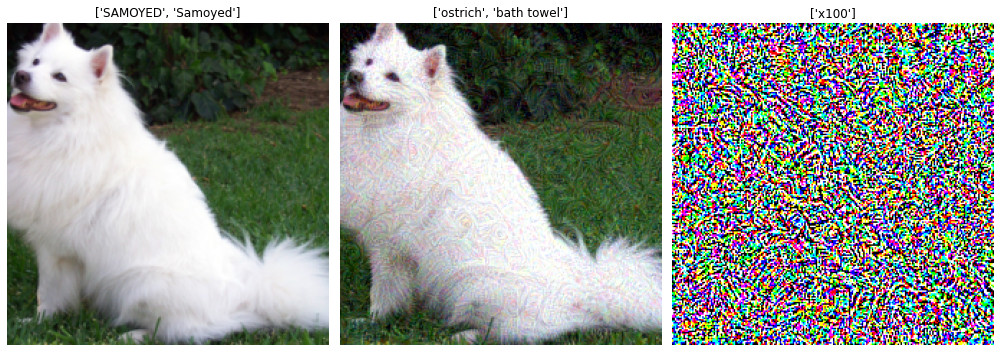

In [ ]:
class_clean=categories[pred_catid]
class_adw=categories[pred_adw_catid]
class_real='SAMOYED'
class_target=categories[goal]
show_clean_adw(xs,xs_adw,class_clean,class_adw,class_real,class_target,postprocess)

In [ ]:
xs[0,0,0:5,0:5]

tensor([[-1.9295, -1.9295, -1.9124, -1.8953, -1.9809],
        [-1.9980, -1.8953, -1.9124, -1.9467, -1.9980],
        [-1.9980, -1.9467, -1.9124, -1.9809, -2.0665],
        [-1.9809, -1.9124, -1.9124, -2.0323, -2.0494],
        [-2.0323, -1.9295, -1.8439, -1.9638, -2.0152]], device='cuda:0')

In [ ]:
xs_adw[0,0,0:5,0:5]

tensor([[-2.0295, -2.0295, -2.2124, -1.9953, -1.8809],
        [-2.2980, -1.9953, -2.2124, -2.0467, -1.8980],
        [-2.0980, -1.8467, -2.0124, -2.0809, -2.1665],
        [-2.0809, -2.2124, -1.8124, -2.1323, -1.7494],
        [-2.1323, -2.0295, -1.9439, -1.8638, -1.9152]], device='cuda:0',
       grad_fn=<SliceBackward0>)

# Задания
Изменяйте параметры и смотрите как это влияет на заметность атаки и ее успешность. Попробуйте подобрать такие NUM_STEPS и EPSILON, для которых вы правильно распознаете изображение, а нейронная сеть - нет.

Меняйте цели в направленной атаке, попробуйте разные цели и параметры. Какие-то изображения проще атаковать, а какие-то сложнее. Приведите примеры изображений, для которых атака прошла, и для которых атака не получилась. Поиграть с другими атаками и наборами данных можно [здесь](https://www.pluribus-one.it/research/sec-ml/demo).

# Заключение
Сегодня существует множество способов атак, для простых и сложных сетей. Есть атаки физические, когда модификация входов происходит не в компьютере, а на реальных объектах (например на лицо приклеивается специальный стикер и вас невозможно распознать). Есть атаки *однопиксельные*, когда мы меняем только один пиксель в изображении  и этого хватает, чтобы обмануть слабую нейронную сеть.

Но можно ли защититься от атаки? Можно. Для этого придумали множество способов, например, такой: самим сделать атакующие примеры, а затем (до)обучить сеть на этих атакующих примерах. Это поможет от тех атак, на которых вы обучались. Но не гарантирует что другие атаки не сработают. Это вечная борьба атакующих и защитников.

Не думайте, что мы учим вас плохому, атаки бывают и полезны. Только понимая принцип атак можно научиться бороться с ними или использовать их для блага. На самом деле, из принципа атаки появились очень интересные виды нейронных сетей, генеративно-состязательные сети, с которыми мы познакомимся в другой раз.

## Ссылки

Использованы и адаптированы материалы:

https://towardsdatascience.com/adversarial-attack-and-defense-on-neural-networks-in-pytorch-82b5bcd9171

https://github.com/cleverhans-lab/cleverhans/blob/master/tutorials/torch/mnist_tutorial.py

https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_vgg.ipynb






